In [1]:
from tensorflow.keras import datasets as kds
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

(images, labels), (test_images, test_labels) = kds.fashion_mnist.load_data()

images, test_images = images/255, test_images/255
label_val_mapping = {0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

images.shape

(60000, 28, 28)

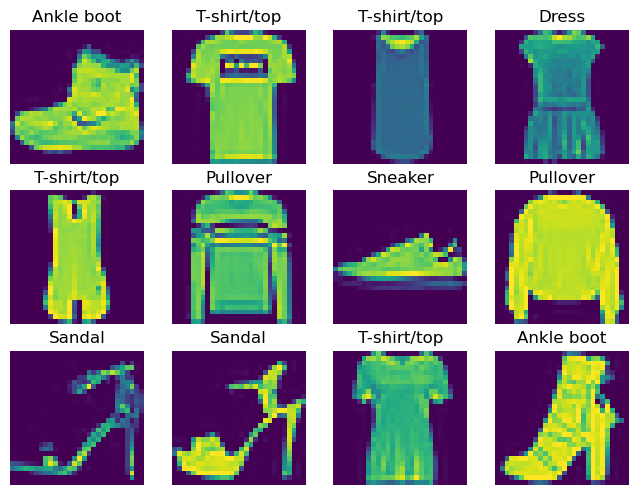

In [2]:
def plot_article(image_array, title):
    image = image_array.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    plt.title(title)

plt.figure(figsize=(8, 8))
for idx, (image, label) in enumerate(
    zip(images[:12], labels[:12])
):
    ax = plt.subplot(4, 4, idx + 1)
    plt.imshow(image)
    plt.axis("off")
    plt.title(label_val_mapping[label])
    ax.set_facecolor("white")
plt.show()


Epoch 1/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7314 - loss: 0.7359 - val_accuracy: 0.8742 - val_loss: 0.3506
Epoch 2/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8755 - loss: 0.3376 - val_accuracy: 0.8769 - val_loss: 0.3333
Epoch 3/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8950 - loss: 0.2906 - val_accuracy: 0.8964 - val_loss: 0.2893
Epoch 4/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9104 - loss: 0.2518 - val_accuracy: 0.8964 - val_loss: 0.2918
Epoch 5/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9174 - loss: 0.2258 - val_accuracy: 0.8958 - val_loss: 0.2984
Epoch 6/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9284 - loss: 0.2024 - val_accuracy: 0.9061 - val_loss: 0.2705


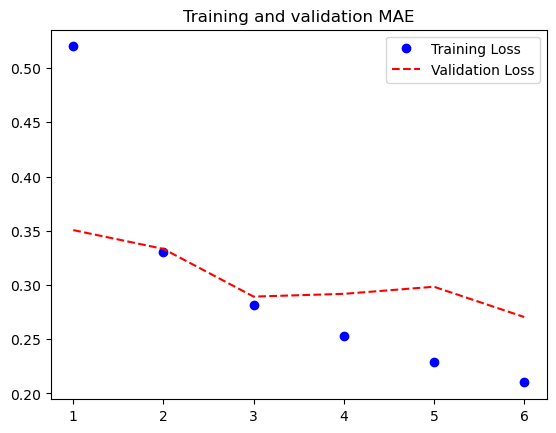

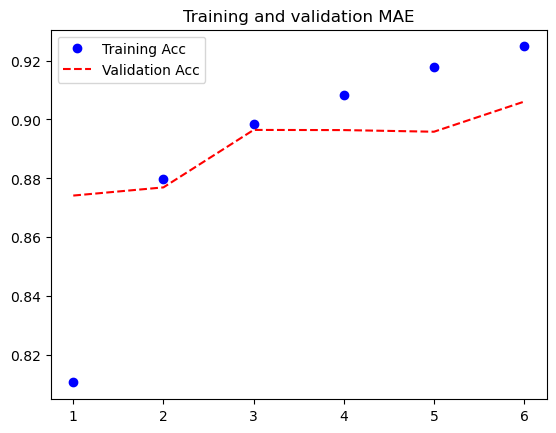

In [3]:
# Clear old model
keras.backend.clear_session()

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

callbacks_list = [
    keras.callbacks.EarlyStopping(monitor="val_accuracy", min_delta=0.1, patience=5),
    keras.callbacks.TensorBoard(
    log_dir="/Users/giacomoaris/Documents/deep-learning-intro-course/sample_projects/mnist_fashion/logs",
)]
history = model.fit(
    images,
    labels,
    epochs=100,
    validation_split=0.3,
    callbacks=callbacks_list,
)

history_dct = history.history

start_at_idx = 0
loss_values = history_dct["loss"][start_at_idx:]
val_loss_values = history_dct["val_loss"][start_at_idx:]
acc = history_dct["accuracy"][start_at_idx:]
val_acc = history_dct["val_accuracy"][start_at_idx:]
epochs = range(1, len(loss_values) + 1)

plt.figure()
plt.plot(epochs, loss_values, "bo", label="Training Loss")
plt.plot(epochs, val_loss_values, "r--", label="Validation Loss")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, acc, "bo", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

In [3]:
images.shape

(60000, 28, 28)